# Descriptive and Exploratory Questions

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2

url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)
print csv.shape

(61776, 5)


### Descriptive

- *What is the total number of synapses in our data set?

In [2]:
print np.sum(csv[:,-1])

7704178.0


- *What is the unmasking variable?*
In the readme for our dataset, jovo writes: "i believe "masked" regions are regions that were "masked" by some computer vision mask that hides things that we know should not be neurons." So unmasked regions should, in general, have more synapses. Let's test this by looking at the correlation between the two.

In [3]:
corr = np.corrcoef(csv[:,3],csv[:,4])
print corr

[[ 1.          0.89621769]
 [ 0.89621769  1.        ]]


- *How clustered are the groups of synapses?*

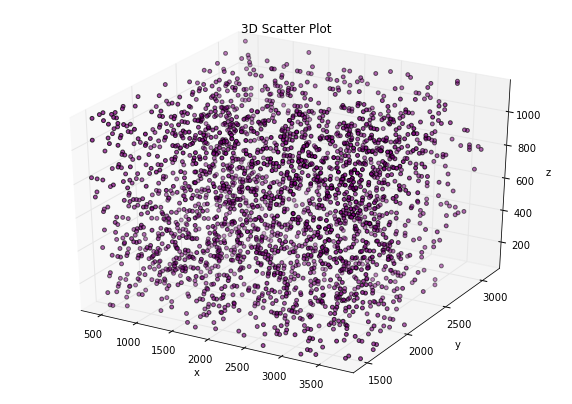

In [4]:
# this is a pretty broad question, but if we plot a random sample of data points where synapses exists,
# we can get a vague idea of how they're structured, we can furthermore restrict which data poitns get sampled
# by only taking ones where the number of synapses is greater than the average

samples = 2500 # how many samples to draw
def check_condition(row):
    if row[-1] == 0:
        return False
    return True

def synapse_filt(row, avg):
    if row[-1] > avg:
        return True
    return False

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonzero_rows = csv[a, :]

avg_synapse = np.mean(nonzero_rows[:, -1])
filter_avg_synapse = np.apply_along_axis(synapse_filt, 1,
                                         nonzero_rows, avg_synapse)
a = np.where(filter_avg_synapse == True)[0]
nonzero_filtered = nonzero_rows[a, :]
xyz_only = nonzero_filtered[:, [0, 1, 2]]

# randomly sample
perm = np.random.permutation(xrange(1, len(xyz_only[:])))
xyz_only = xyz_only[perm[:samples]]

# get range for graphing
mins = [np.amin(xyz_only[:, i]) for i in xrange(3)]
maxs = [np.amax(xyz_only[:, i]) for i in xrange(3)]

# following code adopted from
# https://www.getdatajoy.com/examples/python-plots/3d-scatter-plot
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

ax.set_title('3D Scatter Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(mins[0], maxs[0])
ax.set_ylim(mins[1], maxs[1])
ax.set_zlim(mins[2], maxs[2])

ax.view_init()
ax.dist = 10  # distance

ax.scatter(
           xyz_only[:, 0], xyz_only[:, 1], xyz_only[:, 2],  # data
           c='purple',  # marker colour
           marker='o',  # marker shape
           s=15  # marker size
)

plt.show()

- *How are inhibitory and excitatory classes differentiated?*
In the 2011 paper by Bock et. al. they discuss this, but we believe more data is needed for us to be able to answer this.

### Exploratory

- *How can the data be clustered? (which metrics should be used for clustering?)*
- *What are the centers of such clusters*?
'How can the data be clustered?' is, again, a  pretty broad question. For now, we will use k-means and try a few different k-values. In terms of which metrics to be using, since we're dealing with objects in 3D space, Euclidean distance is the obvious choice.

[[  901.8957529   2155.52509653   647.14285714]
 [ 3288.94708995  1798.06878307   622.13756614]
 [ 1954.11320755  1956.94339623   618.21625544]
 [ 2865.248394    2617.66809422   701.03426124]]


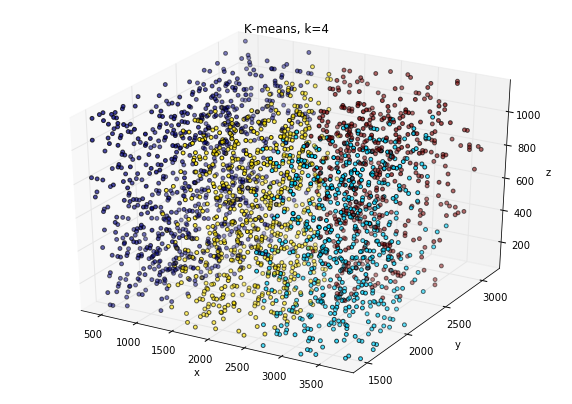

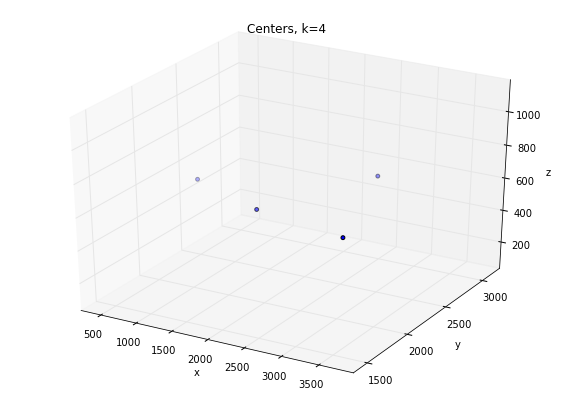

In [5]:
# run k-means on the data filtered like it was previously (only rows where synapses are greater than average)
# doing this to speed up computation time and to limit the number of data points that we will randomly sample 
# from when we graph the clusters

import sklearn.cluster as cluster

def graph_cluster(xyz_only, clusters, centers, k):
    # randomly sample
    samples = 2500
    perm = np.random.permutation(xrange(1, len(xyz_only[:])))
    xyz_only = xyz_only[perm[:samples]]
    clusters = clusters[perm[:samples]]

    # get range for graphing
    mins = [np.amin(xyz_only[:, i]) for i in xrange(3)]
    maxs = [np.amax(xyz_only[:, i]) for i in xrange(3)]

    # following code adopted from
    # https://www.getdatajoy.com/examples/python-plots/3d-scatter-plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca(projection='3d')

    ax.set_title('K-means, k='+str(k))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xlim(mins[0], maxs[0])
    ax.set_ylim(mins[1], maxs[1])
    ax.set_zlim(mins[2], maxs[2])

    ax.view_init()
    ax.dist = 10  # distance

    ax.scatter(
               xyz_only[:, 0], xyz_only[:, 1], xyz_only[:, 2],  # data
               c=clusters,  # marker colour
               marker='o',  # marker shape
               s=15  # marker size
    )

    plt.show()
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca(projection='3d')
    ax.set_title('Centers, k='+str(k))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xlim(mins[0], maxs[0])
    ax.set_ylim(mins[1], maxs[1])
    ax.set_zlim(mins[2], maxs[2])

    ax.view_init()
    ax.dist = 10  # distance

    ax.scatter(
           centers[:, 0], centers[:, 1], centers[:, 2],  # data
           c='blue',  # marker colour
           marker='o',  # marker shape
           s=15  # marker size
    )
    plt.show()

n_clusters = 4
kmeans_algo = cluster.KMeans(n_clusters=n_clusters)
clusters = kmeans_algo.fit_predict(xyz_only)
centers = kmeans_algo.cluster_centers_
print centers
graph_cluster(xyz_only, clusters, centers, n_clusters)

[[ 2869.47608696  2621.66304348   698.07608696]
 [ 1105.9976247   2606.99524941   720.73634204]
 [  861.96696035  1772.48678414   587.50660793]
 [ 3310.00544465  1805.21960073   622.69147005]
 [ 2034.74104235  1892.89576547   610.        ]]


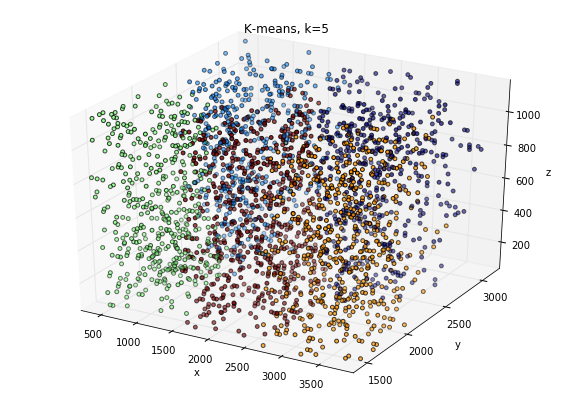

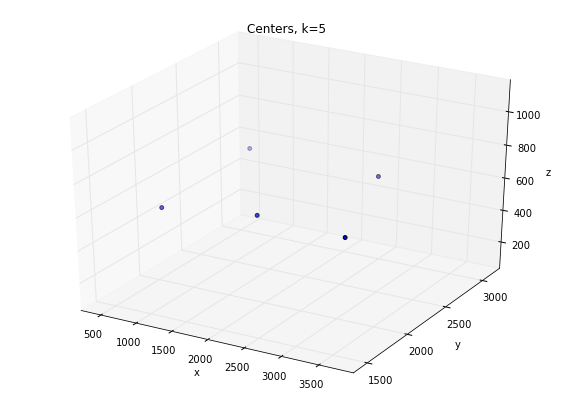

In [6]:
n_clusters = 5
kmeans_algo = cluster.KMeans(n_clusters=n_clusters)
clusters = kmeans_algo.fit_predict(xyz_only)
centers = kmeans_algo.cluster_centers_
print centers
graph_cluster(xyz_only, clusters, centers, n_clusters)

[[ 1685.80497925  1795.24896266   340.09958506]
 [ 3313.76691729  2531.08270677   760.64285714]
 [  865.67741935  2606.65591398   625.51612903]
 [ 1745.73015873  2659.0952381    818.49206349]
 [ 2329.70742358  1806.8558952    928.45851528]
 [ 3466.94411765  1765.65294118   645.58529412]
 [  705.58762887  1742.51546392   528.75257732]
 [ 1298.5804878   1909.67317073   965.2       ]
 [ 2701.78026906  1776.66367713   318.31390135]
 [ 2550.87341772  2618.3164557    593.13924051]]


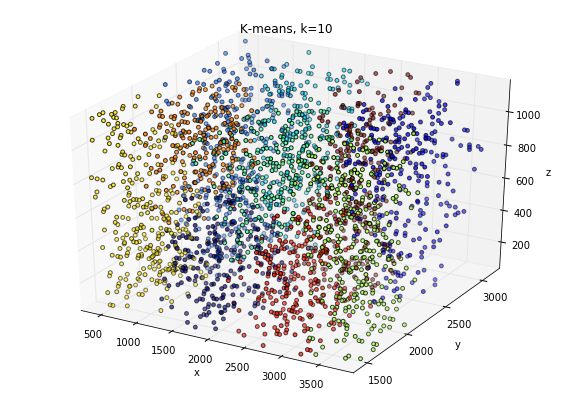

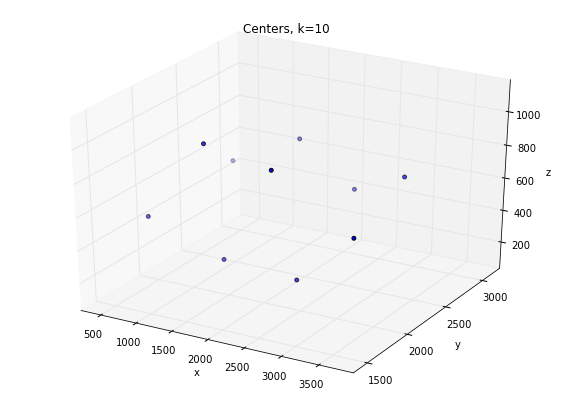

In [7]:
n_clusters = 10
kmeans_algo = cluster.KMeans(n_clusters=n_clusters)
clusters = kmeans_algo.fit_predict(xyz_only)
centers = kmeans_algo.cluster_centers_
print centers
graph_cluster(xyz_only, clusters, centers, n_clusters)

- *What is the mean of the probability mass function (recall our definition from last assignment: There is a probability mass function f: R^3→[0, 1] where f(x, y, z)=probability that a synapse exists at (x, y, z))? What is the covariance?*

In [8]:
# PMF
syns = csv[:,4]
sum = np.sum(syns)
density = syns/sum
mean = np.mean(density)
print mean
# get rid of unmasked column
no_unmasked = csv[:, [0, 1, 2, 4]]
# python crashes when trying to get covariance matrix (line below)
# print np.cov(no_unmasked)

1.61875161875e-05


- *What are the minimum and maximum x, y, and z values? (and thus, the set of (x,y,z) for our data set?*

In [9]:
print [min(csv[:,1]),min(csv[:,2]),min(csv[:,3])] #(x,y,z) minimum
print [max(csv[:,1]),max(csv[:,2]),max(csv[:,3])] #(x,y,z) maximum

[1369.0, 55.0, 0.0]
[3358.0, 1165.0, 165789.0]


- *Where does the maximum number of synapses occur (and what is the max number)?*

In [10]:
# Max number of synapses
max_syn = np.argmax(nonzero_rows[:,4])
print max_syn
loc = (nonzero_rows[max_syn,0],nonzero_rows[max_syn,1],nonzero_rows[max_syn,2]);
print loc

33450
(2749.0, 1876.0, 1054.0)
